In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv("C:/Users/abrah/Downloads/BETO_embeddings_PCA_final.csv")

In [5]:
from sklearn.cluster import KMeans

In [7]:
import numpy as np

In [ ]:
# Asegurarse de que los embeddings están en formato adecuado
X = np.vstack(dataframe['Embedding'].values)

In [26]:
n = 3
k_means = KMeans(n_clusters=n, max_iter=100, random_state=1, algorithm='elkan')
k_means.fit(dataframe[['PCA_1', 'PCA_2']])

c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(algorithm='elkan', max_iter=100, n_clusters=3, random_state=1)

In [27]:
centroides = k_means.cluster_centers_  # Obtiene los centroides de los clústeres
etiquetas = k_means.labels_  # Obtiene las etiquetas de los clústeres asignadas a cada punto de datos

In [28]:
centroides

array([[ 3.79761647,  8.53076971],
       [-2.01032591, -0.00854486],
       [ 2.84303499, -1.18539378]])

In [22]:
# Agregar las etiquetas de los clusters al DataFrame
dataframe['Cluster'] = etiquetas

In [9]:
import os
#Guardar el DataFrame en archivo CSV
directorio = "C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos"
nombre_archivo = 'BETO_kmeansElkan3_maxiter100_state1.csv'
ruta_archivo = os.path.join(directorio, nombre_archivo)
dataframe.to_csv(ruta_archivo, index=False, encoding='utf-8')

Palabras mas cercanas al centroide

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# centroides = np.array([[-0.01971971, -0.00070428],
# [3.49127234, 0.21160937],
# [0.83720398, 0.02193205]])

# Filtrar para cada grupo
cluster_0 = dataframe.loc[dataframe['Cluster'] == 0]
cluster_1 = dataframe.loc[dataframe['Cluster'] == 1]
cluster_2 = dataframe.loc[dataframe['Cluster'] == 2]

cluster_3 = dataframe.loc[dataframe['Cluster'] == 3]
cluster_4 = dataframe.loc[dataframe['Cluster'] == 4]
cluster_5 = dataframe.loc[dataframe['Cluster'] == 5]

cluster_6 = dataframe.loc[dataframe['Cluster'] == 6]
cluster_7 = dataframe.loc[dataframe['Cluster'] == 7]


# Convertir las coordenadas de las palabras en un array numpy
coordenadas_palabras0 = cluster_0[['PCA_1', 'PCA_2']].values
coordenadas_palabras1 = cluster_1[['PCA_1', 'PCA_2']].values
coordenadas_palabras2 = cluster_2[['PCA_1', 'PCA_2']].values

coordenadas_palabras3 = cluster_3[['PCA_1', 'PCA_2']].values
coordenadas_palabras4 = cluster_4[['PCA_1', 'PCA_2']].values
coordenadas_palabras5 = cluster_5[['PCA_1', 'PCA_2']].values

coordenadas_palabras6 = cluster_6[['PCA_1', 'PCA_2']].values
coordenadas_palabras7 = cluster_7[['PCA_1', 'PCA_2']].values

# Definir los centroides
c0 = np.array([centroides[0]])
c1 = np.array([centroides[1]])
c2 = np.array([centroides[2]])

c3 = np.array([centroides[3]])
c4 = np.array([centroides[4]])
c5 = np.array([centroides[5]])

c6 = np.array([centroides[6]])
c7 = np.array([centroides[7]])

# Función para obtener las palabras y sus similitudes
def obtener_palabras_similitudes(centroide, coordenadas, cluster_df):
    similitudes = cosine_similarity(centroide, coordenadas).flatten()
    indices_palabras_cercanas = np.argsort(similitudes)[::-1][:20]
    palabras_cercanas = cluster_df.iloc[indices_palabras_cercanas]['Token'].tolist()
    similitudes_cercanas = similitudes[indices_palabras_cercanas].tolist()
    return palabras_cercanas, similitudes_cercanas

# Obtener palabras y similitudes para cada cluster
palabras_cercanas0, similitudes_cercanas0 = obtener_palabras_similitudes(c0, coordenadas_palabras0, cluster_0)
palabras_cercanas1, similitudes_cercanas1 = obtener_palabras_similitudes(c1, coordenadas_palabras1, cluster_1)
palabras_cercanas2, similitudes_cercanas2 = obtener_palabras_similitudes(c2, coordenadas_palabras2, cluster_2)

palabras_cercanas3, similitudes_cercanas3 = obtener_palabras_similitudes(c3, coordenadas_palabras3, cluster_3)
palabras_cercanas4, similitudes_cercanas4 = obtener_palabras_similitudes(c4, coordenadas_palabras4, cluster_4)
palabras_cercanas5, similitudes_cercanas5 = obtener_palabras_similitudes(c5, coordenadas_palabras5, cluster_5)

palabras_cercanas6, similitudes_cercanas6 = obtener_palabras_similitudes(c6, coordenadas_palabras6, cluster_6)
palabras_cercanas7, similitudes_cercanas7 = obtener_palabras_similitudes(c7, coordenadas_palabras7, cluster_7)

# Mostrar las palabras más cercanas para cada centroide con sus similitudes
for palabra, similitud in zip(palabras_cercanas0, similitudes_cercanas0):
    print(f"Centroide 0 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas1, similitudes_cercanas1):
    print(f"Centroide 1 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas2, similitudes_cercanas2):
    print(f"Centroide 2 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas3, similitudes_cercanas3):
    print(f"Centroide 3 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas4, similitudes_cercanas4):
    print(f"Centroide 4 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas5, similitudes_cercanas5):
    print(f"Centroide 5 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas6, similitudes_cercanas6):
    print(f"Centroide 6 - Palabras: {palabra}, Similitud: {similitud:.4f}")

for palabra, similitud in zip(palabras_cercanas7, similitudes_cercanas7):
    print(f"Centroide 7 - Palabras: {palabra}, Similitud: {similitud:.4f}")

Centroide 0 - Palabras: fomentar, Similitud: 1.0000
Centroide 0 - Palabras: pasaron, Similitud: 1.0000
Centroide 0 - Palabras: obtuvieron, Similitud: 1.0000
Centroide 0 - Palabras: ruso, Similitud: 1.0000
Centroide 0 - Palabras: ruso, Similitud: 1.0000
Centroide 0 - Palabras: ruso, Similitud: 1.0000
Centroide 0 - Palabras: ruso, Similitud: 1.0000
Centroide 0 - Palabras: sociales, Similitud: 1.0000
Centroide 0 - Palabras: corruptos, Similitud: 1.0000
Centroide 0 - Palabras: siente, Similitud: 1.0000
Centroide 0 - Palabras: ojos, Similitud: 1.0000
Centroide 0 - Palabras: llenado, Similitud: 1.0000
Centroide 0 - Palabras: tomar, Similitud: 1.0000
Centroide 0 - Palabras: dis, Similitud: 1.0000
Centroide 0 - Palabras: ##dos, Similitud: 1.0000
Centroide 0 - Palabras: ##dos, Similitud: 1.0000
Centroide 0 - Palabras: escuelas, Similitud: 1.0000
Centroide 0 - Palabras: latina, Similitud: 1.0000
Centroide 0 - Palabras: sinte, Similitud: 1.0000
Centroide 0 - Palabras: dinero, Similitud: 1.0000
Ce

In [48]:
# Calcular el número de puntos en cada cluster
cluster_counts = dataframe['Cluster'].value_counts()

print(cluster_counts)

Cluster
0    221816
1    172313
4    136355
5    130954
3    101680
6     27221
2     20496
7     19212
Name: count, dtype: int64


In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
import plotly.offline as pyo
import plotly.graph_objects as go

In [30]:
fig = go.Figure()


# Iterar sobre cada cluster y agregar puntos al gráfico con una escala de colores predefinida
for cluster_num in dataframe['Cluster'].unique():
    cluster_points = dataframe[dataframe['Cluster'] == cluster_num]
    fig.add_trace(go.Scatter(x=cluster_points['PCA_1'], y=cluster_points['PCA_2'], mode='markers', 
                             marker=dict(color=cluster_num, colorscale='Viridis'), 
                             text=cluster_points['Token'], name=f'Grupo {cluster_num}'))

# Extraer coordenadas de los centroides
centroides_x = centroides[:, 0]
centroides_y = centroides[:, 1]

# Agregar los centroides al gráfico
fig.add_trace(go.Scatter(x=centroides_x, y=centroides_y, mode='markers',
                         marker=dict(color='black', symbol='x', size=6),
                         text=[f'Centroide {i}' for i in range(len(centroides))], 
                         name='Centroides'))

# Configurar el diseño del gráfico
fig.update_layout(title='Grupos K-Medias Elkan', xaxis_title='ACP_1', yaxis_title='ACP_2')

# Mostrar la gráfica interactiva
#fig.show()
# Guardar la gráfica interactiva en un archivo HTML
pyo.plot(fig, filename='C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos/kMedia8Grupos_state1_BETO.html', auto_open=False)

'C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos/kMedia6Grupos_state1_BETO.html'

In [24]:
# Filtrar para cada grupo
clusters = [dataframe.loc[dataframe['Cluster'] == i] for i in range(8)]

# Colores para cada cluster
colores = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan']

# Función para obtener las palabras y sus similitudes
def obtener_palabras_similitudes(centroide, coordenadas, cluster_df):
    similitudes = cosine_similarity(centroide, coordenadas).flatten()
    indices_palabras_cercanas = np.argsort(similitudes)[::-1][:20] # palabras mas cercanas
    palabras_cercanas = cluster_df.iloc[indices_palabras_cercanas]['Token'].tolist()
    similitudes_cercanas = similitudes[indices_palabras_cercanas].tolist()
    coordenadas_cercanas = coordenadas[indices_palabras_cercanas]
    return palabras_cercanas, similitudes_cercanas, coordenadas_cercanas

# Obtener palabras, similitudes y coordenadas para cada cluster
resultados = [obtener_palabras_similitudes(np.array([centroides[i]]), clusters[i][['PCA_1', 'PCA_2']].values, clusters[i]) for i in range(8)]

# Crear la figura de Plotly
fig = go.Figure()

# Agregar los puntos de las palabras más cercanas con etiquetas y colores diferentes
for i, (palabras, similitudes, coords) in enumerate(resultados):
    fig.add_trace(go.Scatter(
        x=coords[:, 0], 
        y=coords[:, 1], 
        mode='markers+text', 
        marker=dict(size=10, symbol='circle', color=colores[i]), 
        #text=[f'{palabra}' for palabra, similitud in zip(palabras, similitudes)], 
        textposition='top center',
        showlegend=False 
        #name=f'Palabras más cercanas {i}'
    ))

# Extraer coordenadas de los centroides
centroides_x = centroides[:, 0]
centroides_y = centroides[:, 1]

# Agregar los centroides al gráfico
fig.add_trace(go.Scatter(x=centroides_x, y=centroides_y, mode='markers',
                         marker=dict(color='black', symbol='x', size=6),
                         text=[f'Centroide {i}' for i in range(len(centroides))], 
                         name='Centroides'))

# Configurar el diseño del gráfico
fig.update_layout(title='Palabras/Tokens más similares a cada centroide', xaxis_title='ACP_1', yaxis_title='ACP_2')

# Mostrar la gráfica interactiva
#fig.show()

# Guardar la gráfica interactiva en un archivo HTML
pyo.plot(fig, filename='C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos/graficos/grafico_BETO8C_20Words_nowords_state0.html', auto_open=False)

'C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos/graficos/grafico_BETO8C_20Words_nowords_state0.html'

In [15]:

# Filtrar para cada grupo
clusters = [dataframe.loc[dataframe['Cluster'] == i] for i in range(8)]

# Colores para cada cluster
colores = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan']

# Función para obtener las palabras y sus similitudes
def obtener_palabras_similitudes(centroide, coordenadas, cluster_df):
    similitudes = cosine_similarity(centroide, coordenadas).flatten()
    indices_palabras_cercanas = np.argsort(similitudes)[::-1][:20]
    palabras_cercanas = cluster_df.iloc[indices_palabras_cercanas]['Token'].tolist()
    similitudes_cercanas = similitudes[indices_palabras_cercanas].tolist()
    coordenadas_cercanas = coordenadas[indices_palabras_cercanas]
    return palabras_cercanas, similitudes_cercanas, coordenadas_cercanas

# Obtener palabras, similitudes y coordenadas para cada cluster
resultados = [obtener_palabras_similitudes(np.array([centroides[i]]), clusters[i][['PCA_1', 'PCA_2']].values, clusters[i]) for i in range(8)]

# Crear la figura de Plotly
fig = go.Figure()

# Agregar los puntos de las palabras más cercanas con etiquetas y colores diferentes
for i, (palabras, similitudes, coords) in enumerate(resultados):
    fig.add_trace(go.Scatter(
        x=coords[:, 0], 
        y=coords[:, 1], 
        mode='markers+text', 
        marker=dict(size=10, symbol='circle', color=colores[i]), 
        text=[f'{palabra}' for palabra, similitud in zip(palabras, similitudes)], 
        textposition='top center',
        showlegend=False
        #name=f'Palabras más cercanas {i}'
    ))

# Extraer coordenadas de los centroides
centroides_x = centroides[:, 0]
centroides_y = centroides[:, 1]

# Agregar los centroides al gráfico
fig.add_trace(go.Scatter(x=centroides_x, y=centroides_y, mode='markers',
                         marker=dict(color='black', symbol='x', size=12),
                         text=[f'Centroide {i}' for i in range(len(centroides))], 
                         name='Centroides'))

# Configurar el diseño del gráfico
fig.update_layout(title='Palabras más cercanas a cada centroide', xaxis_title='ACP_1', yaxis_title='ACP_2')

# Mostrar la gráfica interactiva
#fig.show()

# Guardar la gráfica interactiva en un archivo HTML
pyo.plot(fig, filename='C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos/graficos/grafico_BETO8C_20Words_state0.html', auto_open=False)

'C:/Users/abrah/OneDrive/Escritorio/8 semestre/Analisis de sentimientos/graficos/grafico_BETO8C_20Words_state0.html'

Grafico de densidad

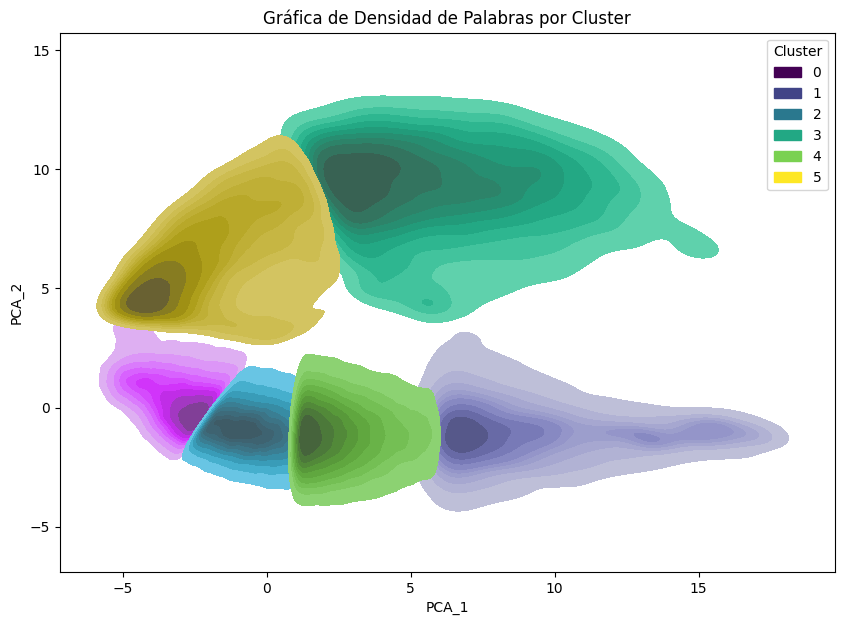

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una gráfica de densidad de palabras
plt.figure(figsize=(10, 7))

# Utilizamos seaborn para crear la gráfica de densidad
sns.kdeplot(data=dataframe, x='PCA_1', y='PCA_2', hue='Cluster', fill=True, common_norm=False, palette='viridis')

plt.title('Gráfica de Densidad de palabras y tokens por Grupo')
plt.xlabel('ACP_1')
plt.ylabel('ACP_2')
plt.show()


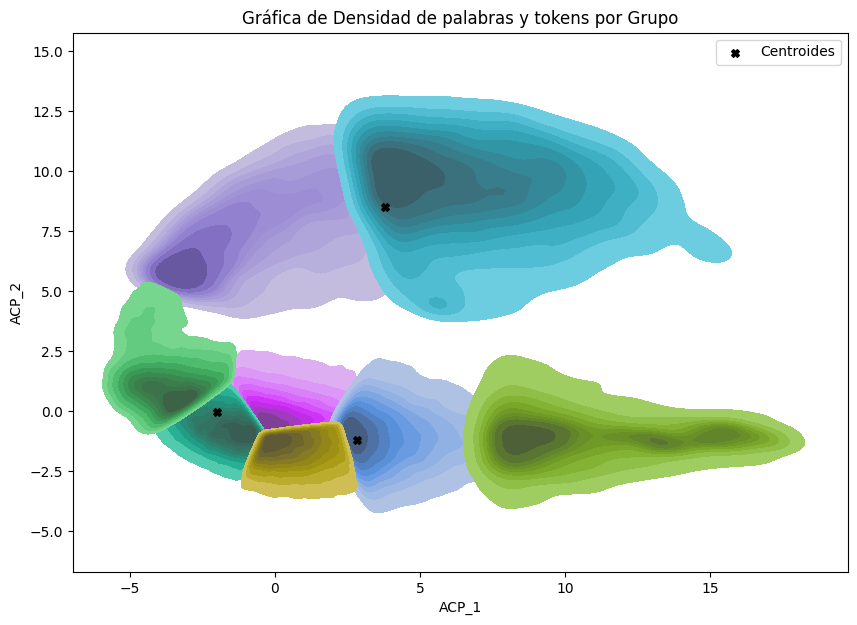

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear una gráfica de densidad de palabras
plt.figure(figsize=(10, 7))

# Utilizamos seaborn para crear la gráfica de densidad
sns.kdeplot(data=dataframe, x='PCA_1', y='PCA_2', hue='Cluster', fill=True, common_norm=False, palette='viridis')

# Dibujar los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], color='black', marker='X', s=30, label='Centroides')

# Agregar leyenda para los centroides
plt.legend()

plt.title('Gráfica de Densidad de palabras y tokens por Grupo')
plt.xlabel('ACP_1')
plt.ylabel('ACP_2')
plt.show()


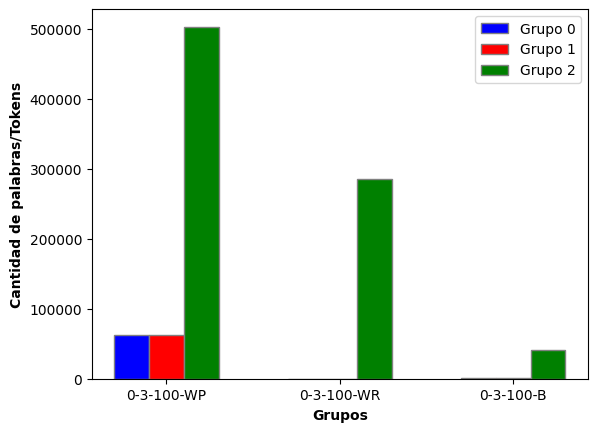

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
categorias = ['0-3-100-WP', '0-3-100-WR', '0-3-100-B']
valores1 = [62734, 98, 1070]
valores2 = [62366, 105, 1431]
valores3 = [502667, 285853, 41527]


# Número de conjuntos de datos
num_conjuntos = 3

# Ancho de las barras
bar_width = 0.2

# Posiciones de las barras
r1 = np.arange(len(categorias))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


# Crear las barras
plt.bar(r1, valores1, color='b', width=bar_width, edgecolor='grey', label='Grupo 0')
plt.bar(r2, valores2, color='r', width=bar_width, edgecolor='grey', label='Grupo 1')
plt.bar(r3, valores3, color='g', width=bar_width, edgecolor='grey', label='Grupo 2')


# Añadir etiquetas
plt.xlabel('Grupos', fontweight='bold')
plt.ylabel('Cantidad de palabras/Tokens', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categorias))], categorias)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


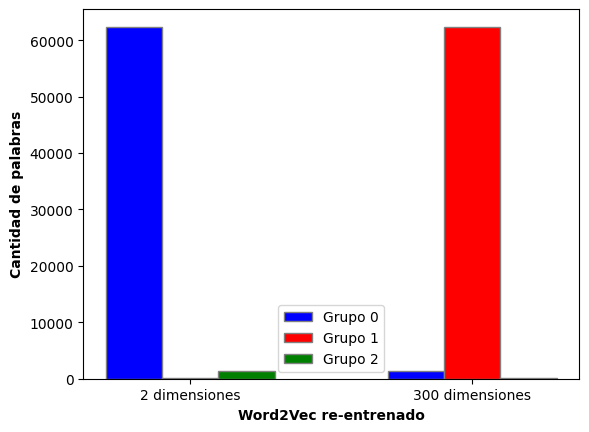

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
categorias = ['2 dimensiones', '300 dimensiones']
# valores1 = [62734, 98, 1070]
# valores2 = [62366, 105, 1431]
# valores3 = [502667, 285853, 41527]

valores1 = [62366, 1425]
valores2 = [105, 62378]
valores3 = [1431, 99]

# Número de conjuntos de datos
num_conjuntos = 3

# Ancho de las barras
bar_width = 0.2

# Posiciones de las barras
r1 = np.arange(len(categorias))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
plt.bar(r1, valores1, color='b', width=bar_width, edgecolor='grey', label='Grupo 0')
plt.bar(r2, valores2, color='r', width=bar_width, edgecolor='grey', label='Grupo 1')
plt.bar(r3, valores3, color='g', width=bar_width, edgecolor='grey', label='Grupo 2')

# Añadir etiquetas
plt.xlabel('Word2Vec re-entrenado', fontweight='bold')
plt.ylabel('Cantidad de palabras', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categorias))], categorias)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
